In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

register(
        id='FrozenLake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name' : '4x4',
                       'is_slippery' : False}
)
env = gym.make('FrozenLake-v3')

%matplotlib inline

[2017-02-07 19:03:51,326] Making new env: FrozenLake-v3


In [2]:
def rargmax(vector): # Q value가 다 0일 때, 랜덤으로 뽑기 위한 함수
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices) 

In [3]:
Q = np.zeros([env.observation_space.n,env.action_space.n])

In [4]:
Q.shape

(16, 4)

In [5]:
num_episodes = 2000

In [6]:
rList = [] # create lists to contain total rewards and steps per episode
for i_episode in range(num_episodes):
    state = env.reset()
    rAll = 0 # 모든 리워드?
    done = False
    
    while not done: # 한판 끝날 때 까지 해봐서 Q-value를 업데이트를 해나간다
        action = rargmax(Q[state, :])
        
        new_state, reward, done, _ = env.step(action)
        Q[state,action] = reward + np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
    rList.append(rAll)

In [8]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

Success rate: 0.943
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


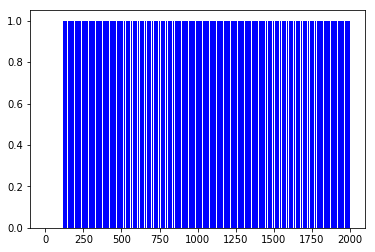

In [9]:
plt.bar(range(len(rList)), rList, color="blue")
plt.show()